In [1]:
import zipfile
zip_ref = zipfile.ZipFile('BC NEW dataset (40X).zip')
zip_ref.extractall("/content")
zip_ref.close()

In [2]:
import numpy as np
import matplotlib
import shutil
import glob
import os
import math
!pip install sciPY
import scipy
!pip install matplotlib
import numpy as np
import matplotlib
import shutil
import glob
import os
import math
!pip install Pillow
!pip install tensorflow
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
#from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential  # Assuming TensorFlow 2.0+
import keras
!pip install keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
!pip install keras-preprocessing
from keras.preprocessing.image import ImageDataGenerator  # Assuming TensorFlow 2.0+
from tensorflow.keras.regularizers import l1, l2
import PIL.Image
from tensorflow.keras.preprocessing.image import load_img


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#count number of images and classes Benign=0 maligant=1
import os

ROOT_DIR = "C:/content/BC NEW dataset (40X)"  # Corrected directory path
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()


dict_items([('benign 40X', 626), ('maligant 40X', 924)])

In [6]:
# Count the number of images in each class
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Split the dataset: 70% training, 15% testing, and 15% validation
if not os.path.exists("./train"):
    os.mkdir("./train")
    os.mkdir("./test")
    os.mkdir("./validation")

    for dir in os.listdir(ROOT_DIR):
        os.makedirs("./train/" + dir)
        os.makedirs("./test/" + dir)
        os.makedirs("./validation/" + dir)
        # Calculate the number of images for each split
        train_size = math.floor(0.7 * number_of_images[dir])
        test_size = math.floor(0.15 * number_of_images[dir])
        validation_size = number_of_images[dir] - train_size - test_size

        # Get a random sample of images for each split
        all_images = os.listdir(os.path.join(ROOT_DIR, dir))
        train_images = np.random.choice(all_images, size=train_size, replace=False)
        remaining_images = list(set(all_images) - set(train_images))
        test_images = np.random.choice(remaining_images, size=test_size, replace=False)
        validation_images = list(set(remaining_images) - set(test_images))

        # Move images to the appropriate folders
        for img in train_images:
            source_path = os.path.join(ROOT_DIR, dir, img)
            destination_path = os.path.join("./train", dir, img)
            shutil.copy(source_path, destination_path)
            os.remove(source_path)

        for img in test_images:
            source_path = os.path.join(ROOT_DIR, dir, img)
            destination_path = os.path.join("./test", dir, img)
            shutil.copy(source_path, destination_path)
            os.remove(source_path)

        for img in validation_images:
            source_path = os.path.join(ROOT_DIR, dir, img)
            destination_path = os.path.join("./validation", dir, img)
            shutil.copy(source_path, destination_path)
            os.remove(source_path)
else:
    print("The folders already exist.")


In [7]:

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
!pip install keras
import tensorflow as tf  # Assuming you're using TensorFlow with Keras

# Define your data directories
train_path = "train"
validation_path = "validation"  # Clear name for validation set
test_path = "test"               # Separate directory for testing

# Set up data generators for training, validation, and testing

def preprocessing_images(path, target_size=(224, 224), batch_size=64, class_mode='binary'):
  """
  Preprocesses images using ImageDataGenerator and returns a data generator.

  Args:
      path: Path to the directory containing images.
      target_size: Target size (width, height) to resize the images.
      batch_size: Batch size for training the model.
      class_mode: Mode for classifying images ('binary' for 2 classes,
                   'categorical' for more than 2 classes).

  Returns:
      A Keras ImageDataGenerator object representing the preprocessed dataset.
  """

  image_data = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rescale=1/255,  # Normalize pixel values to [0, 1]
      zoom_range=0.1,  # Randomly zoom images by up to 10%
      shear_range=0.2,  # Randomly shear images by up to 20 degrees
      rotation_range=20,  # Randomly rotate images by up to 20 degrees
      horizontal_flip=True,  # Randomly flip images horizontally
      vertical_flip=True   # Randomly flip images vertically
  )

  # Use flow_from_directory to create data generators
  image_generator = image_data.flow_from_directory(
      directory=path,
      target_size=target_size,
      batch_size=batch_size,
      class_mode=class_mode
  )

  return image_generator



# Create training, validation, and test data generators
train_data = preprocessing_images(train_path)
val_data = preprocessing_images(validation_path)
test_data = preprocessing_images(test_path)  # Create a separate generator for testing

# Build your image classification model (code not provided)

# Train your model using train_data and val_data for validation

# Evaluate your model's performance on the test set using test_data

# (Code for building, training, and evaluating the model is not provided)


Found 1084 images belonging to 2 classes.
Found 235 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


In [8]:
#Define your data directories
train_path = "train"
test_path = "test"

# Set up data generators for training and validation
def preprocessingImages(path):
    # Apply data augmentation (rotation and flip)
    image_data = ImageDataGenerator(
        rescale=1/255,
        zoom_range=0.1,
        shear_range=0.2,
        rotation_range=20,  # Rotate images randomly up to 20 degrees
        horizontal_flip=True,  # Flip images horizontally
        vertical_flip=True  # Flip images vertically
    )
    image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='binary')
    return image

train_data = preprocessingImages(train_path)
test_data = preprocessingImages(test_path)
val_data = preprocessingImages(test_path)  # Create validation data similarly to training data

Found 1084 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


In [9]:
#Define your data directories
train_path = "train"
test_path = "test"

# Set up data generators for training and validation
def preprocessingImages(path):
    # Apply data augmentation (rotation and flip)
    image_data = ImageDataGenerator(
        rescale=1/255,
        zoom_range=0.1,
        shear_range=0.2,
        rotation_range=20,  # Rotate images randomly up to 20 degrees
        horizontal_flip=True,  # Flip images horizontally
        vertical_flip=True  # Flip images vertically
    )
    image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=40, class_mode='binary')
    return image

train_data = preprocessingImages(train_path)
val_data = preprocessingImages(test_path)  # Create validation data similarly to training data

print("Data generators for training and validation (with data augmentation) created successfully!")

Found 1084 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Data generators for training and validation (with data augmentation) created successfully!


In [ ]:
! pip install tensorflow

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet

In [11]:
base_model=MobileNet(input_shape=(224,224,3),include_top=False)

In [13]:
X=Flatten()(base_model.output)
X=Dense(units=1,activation ='sigmoid')(X)
model=Model(base_model.input,X)

In [ ]:
!pip install tensorflow

In [14]:
# Define learning rate schedules(final)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For image data handling
# Create a Sequential model
def lr_schedule(epoch, lr_warmup_epochs=50, lr_min=1e-5, lr_max=5e-5, lr_exp_decay=0.8):
  """
  Defines a learning rate schedule with warmup and exponential decay.

  Args:
    epoch (int): Current training epoch.
    lr_warmup_epochs (int, optional): Number of epochs for warmup. Defaults to 50.
    lr_min (float, optional): Minimum learning rate. Defaults to 1e-5.
    lr_max (float, optional): Maximum learning rate. Defaults to 5e-5.
    lr_exp_decay (float, optional): Learning rate exponential decay factor. Defaults to 0.8.

  Returns:
    float: The learning rate for the current epoch.
  """
  lr_start = lr_min
  if epoch < lr_warmup_epochs:
    lr = (lr_max - lr_start) / lr_warmup_epochs * epoch + lr_start
  else:
    lr = (lr_max - lr_min) * lr_exp_decay ** (epoch - lr_warmup_epochs) + lr_min
  return lr

def step_decay(epoch):
  """
  Defines a learning rate schedule with step-wise decay.

  Args:
    epoch (int): Current training epoch.

  Returns:
    float: The learning rate for the current epoch.
  """
  decay_factor = 0.8  # Adjust this factor for desired decay rate
  initial_learning_rate = 0.01
  lrate = initial_learning_rate * (1 / (1 + decay_factor * epoch))
  return lrate

# Compile the model (assuming you have defined it and set the optimizer)
model.compile(optimizer='RMSprop', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

# Choose the desired learning rate schedule
#learning_rate_scheduler = LearningRateScheduler(lr_schedule)  # Uncomment for exponential decay with warmup
learning_rate_scheduler = LearningRateScheduler(step_decay)  # Uncomment for step-wise decay (optional)

# If using a learning rate scheduler, add it to the model callbacks
if learning_rate_scheduler:
  callbacks = [learning_rate_scheduler]


**optional to adjust weight**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 186624)            0         
                                                                 
 dense_10 (Dense)            (None, 32)               

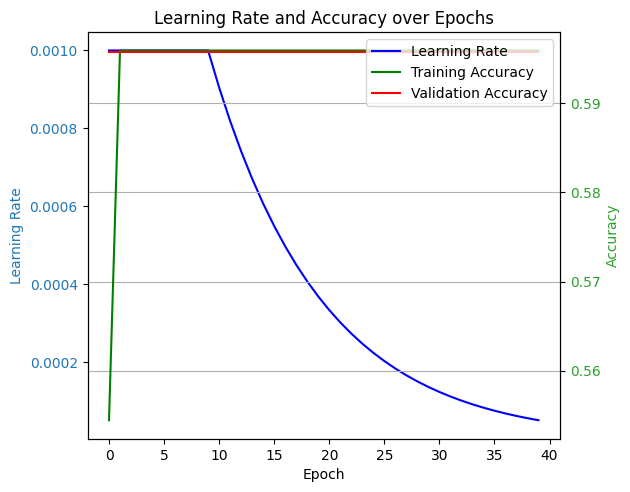

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define a simple learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Callback to record the learning rate at each epoch
class LearningRateTracker(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = float(tf.keras.backend.get_value(self.model.optimizer.lr))

# Example model (you can replace this with your actual model)
model = tf.keras.models.Sequential()

# Add a Convolutional layer with 32 filters (3x3 kernel) and ReLU activation
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a MaxPooling layer (2x2)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional layer with 64 filters (3x3 kernel) and ReLU activation
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling layer (2x2)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
model.add(tf.keras.layers.Flatten())

# Add a fully connected layer with 32 units and ReLU activation
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add the output layer with 1 unit (for binary classification) and sigmoid activation
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create the LearningRateScheduler and LearningRateTracker callbacks
lr_tracker = LearningRateTracker()
lr_scheduler = LearningRateScheduler(lr_schedule)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with the callbacks
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[lr_scheduler, lr_tracker, checkpoint]
)

# Extract learning rates, accuracy, and validation accuracy
lrs = history.history['lr']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot learning rate and accuracy
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Learning Rate', color='tab:blue')
ax1.plot(range(len(lrs)), lrs, 'b-', label='Learning Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:green')
ax2.plot(range(len(accuracy)), accuracy, 'g-', label='Training Accuracy')
ax2.plot(range(len(val_accuracy)), val_accuracy, 'r-', label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('Learning Rate and Accuracy over Epochs')
plt.grid()
plt.show()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 186624)            0         
                                                                 
 dense_4 (Dense)             (None, 32)               

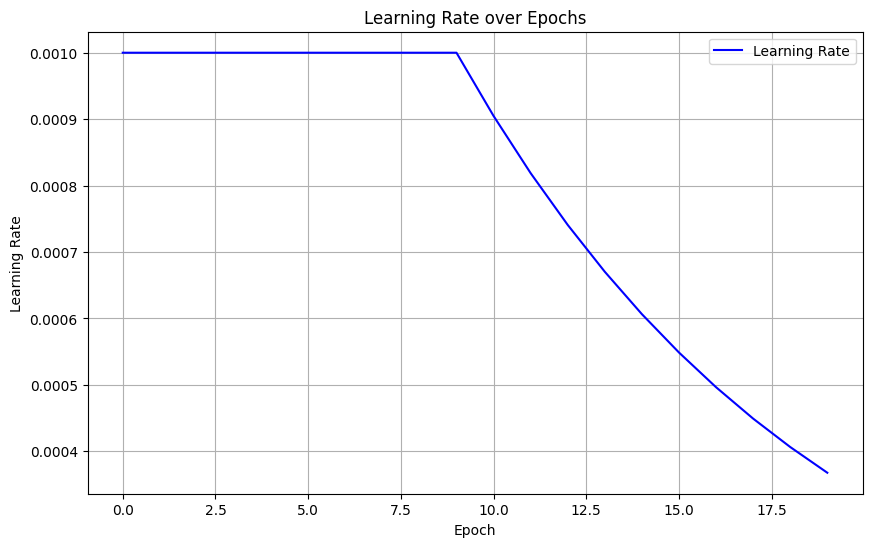

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler, Callback
import tensorflow as tf

# Define a simple learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Callback to record the learning rate at each epoch
class LearningRateTracker(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = float(tf.keras.backend.get_value(self.model.optimizer.lr))

# Example model (you can replace this with your actual model)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

 
model = Sequential()

# Add a Convolutional layer with 32 filters (3x3 kernel) and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a MaxPooling layer (2x2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional layer with 64 filters (3x3 kernel) and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling layer (2x2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
model.add(Flatten())

# Add a fully connected layer with 128 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the output layer with 1 unit (for binary classification) and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create the LearningRateScheduler and LearningRateTracker callbacks
lr_tracker = LearningRateTracker()
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with the callbacks
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[lr_scheduler, lr_tracker]
)

# Extract learning rates and plot
lrs = history.history['lr']

plt.figure(figsize=(10, 6))
plt.plot(range(len(lrs)), lrs, 'b-', label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Epochs')
plt.legend()
plt.grid()
plt.show()



Epoch 1/20
28/28 [==============================] - 26s 891ms/step - loss: 2.0433 - accuracy: 0.5212 - val_loss: 1.8680 - val_accuracy: 0.4026 - lr: 0.0010
Epoch 2/20
28/28 [==============================] - 24s 866ms/step - loss: 0.7041 - accuracy: 0.6255 - val_loss: 0.6240 - val_accuracy: 0.6580 - lr: 0.0010
Epoch 3/20
28/28 [==============================] - 24s 858ms/step - loss: 0.6334 - accuracy: 0.6688 - val_loss: 0.5516 - val_accuracy: 0.7792 - lr: 0.0010
Epoch 4/20
28/28 [==============================] - 24s 878ms/step - loss: 0.6068 - accuracy: 0.7168 - val_loss: 0.5495 - val_accuracy: 0.7965 - lr: 0.0010
Epoch 5/20
28/28 [==============================] - 24s 864ms/step - loss: 0.6044 - accuracy: 0.7131 - val_loss: 0.5449 - val_accuracy: 0.8009 - lr: 0.0010
Epoch 6/20
28/28 [==============================] - 24s 860ms/step - loss: 0.5936 - accuracy: 0.7122 - val_loss: 0.5388 - val_accuracy: 0.7273 - lr: 0.0010
Epoch 7/20
28/28 [==============================] - 25s 874ms/st

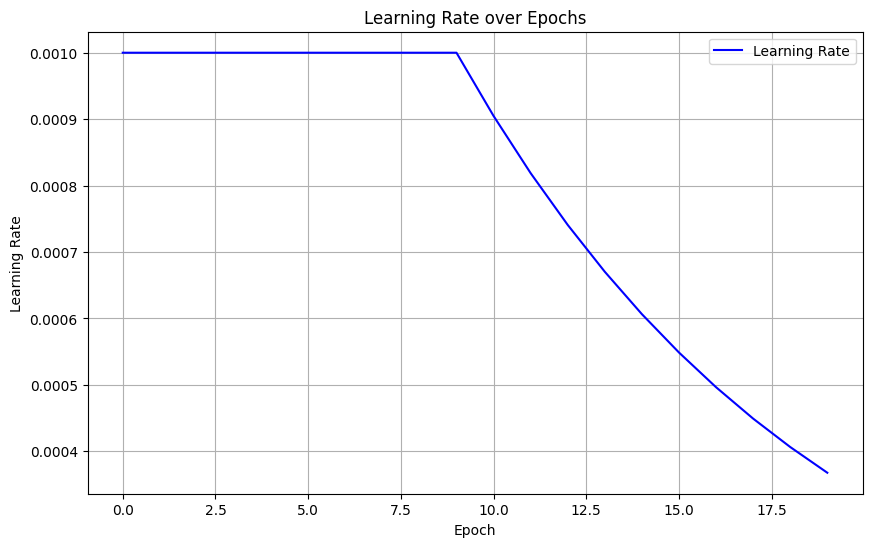

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler, Callback
import tensorflow as tf

# Define a simple learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Callback to record the learning rate at each epoch
class LearningRateTracker(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = float(tf.keras.backend.get_value(self.model.optimizer.lr))

# Example model (you can replace this with your actual model)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create the LearningRateScheduler and LearningRateTracker callbacks
lr_tracker = LearningRateTracker()
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with the callbacks
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[lr_scheduler, lr_tracker]
)

# Extract learning rates and plot
lrs = history.history['lr']

plt.figure(figsize=(10, 6))
plt.plot(range(len(lrs)), lrs, 'b-', label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Epochs')
plt.legend()
plt.grid()
plt.show()



Epoch 1/15


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - ETA: 0s - loss: 2.5962 - accuracy: 0.7050

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


5/5 [==============================] - 23s 3s/step - loss: 2.5962 - accuracy: 0.7050 - val_loss: 10.4838 - val_accuracy: 0.8312 - lr: 0.0010
Epoch 2/15
5/5 [==============================] - 4s 692ms/step - loss: 0.6034 - accuracy: 0.8841 - lr: 0.0010
Epoch 3/15
5/5 [==============================] - 5s 1s/step - loss: 0.2405 - accuracy: 0.8900 - lr: 0.0010
Epoch 4/15
5/5 [==============================] - 4s 849ms/step - loss: 0.3088 - accuracy: 0.8950 - lr: 0.0010
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 0.1123 - accuracy: 0.9700 - lr: 0.0010
Epoch 6/15
5/5 [==============================] - 6s 1s/step - loss: 0.1561 - accuracy: 0.9451 - lr: 1.0000e-04
Epoch 7/15
5/5 [==============================] - 4s 670ms/step - loss: 0.1825 - accuracy: 0.9573 - lr: 1.0000e-04
Epoch 8/15
5/5 [==============================] - 4s 865ms/step - loss: 0.2373 - accuracy: 0.9350 - lr: 1.0000e-04
Epoch 9/15
5/5 [==============================] - 6s 2s/step - loss: 0.2092 - a

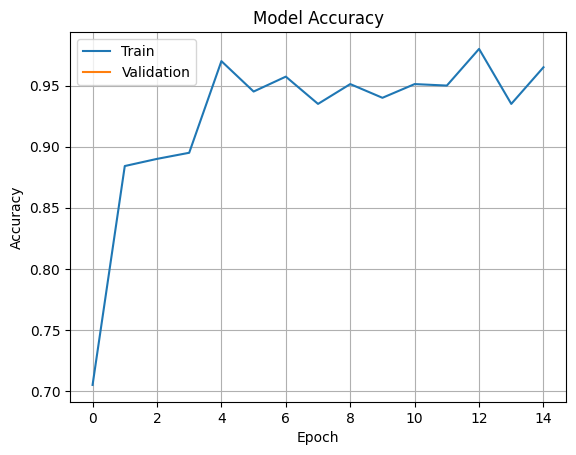

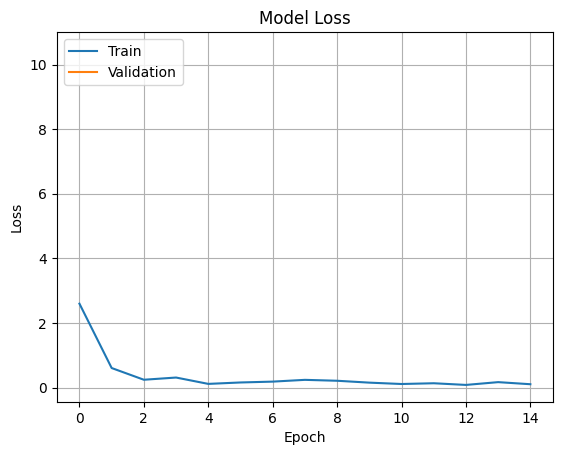

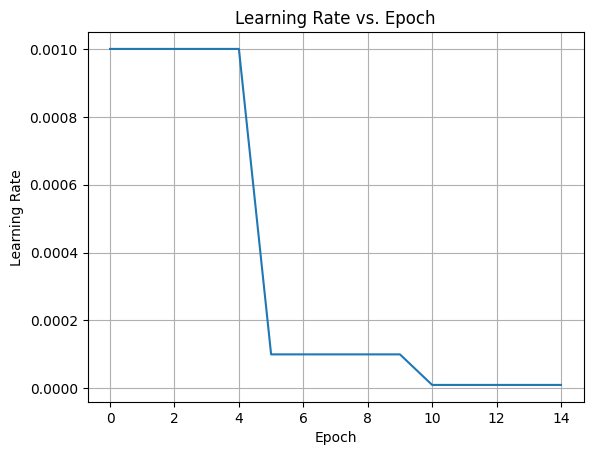

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
# Define your learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch < 5:
        return 0.001  # Learning rate for the first 10 epochs
    elif epoch < 10:
        return 0.0001  # Learning rate for the next 10 epochs
    else:
        return 0.00001  # Learning rate for the remaining epochs
# Compile the model (assuming you have defined it and set the optimizer)
model.compile(optimizer='RMSprop', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

# Choose the desired learning rate schedule
learning_rate_scheduler = LearningRateScheduler(lr_schedule)  # Uncomment for exponential decay with warmup
# learning_rate_scheduler = LearningRateScheduler(step_decay)  # Uncomment for step-wise decay (optional)

# If using a learning rate scheduler, add it to the model callbacks
if learning_rate_scheduler:
 callbacks = [learning_rate_scheduler]

 history = model.fit_generator(generator=train_data, steps_per_epoch=5, epochs=15, verbose=1,
                               validation_data=val_data, validation_steps=10,
                               callbacks=[learning_rate_scheduler])

# Visualize training progress (accuracy, loss, and learning rate)

# Accuracy plot (if 'accuracy' and 'val_accuracy' are available)
if 'accuracy' in history.history.keys() and 'val_accuracy' in history.history.keys():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Learning rate plot
learning_rates = history.history['lr']
epochs = range(len(learning_rates))
plt.plot(epochs, learning_rates)
plt.title('Learning Rate vs. Epoch')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

In [ ]:
#model Accuracy
acc=model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100} %")

the accuracy of our model is 80.51947951316833 %


Found 1084 files belonging to 2 classes.
Found 235 files belonging to 2 classes.
Epoch 1/15


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - ETA: 0s - loss: 1.1522 - accuracy: 0.7188

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert



Epoch 1: val_accuracy improved from -inf to 0.71489, saving model to best_model.h5
5/5 [==============================] - 18s 1s/step - loss: 1.1522 - accuracy: 0.7188 - val_loss: 0.7587 - val_accuracy: 0.7149 - lr: 0.0010
Epoch 2/15
5/5 [==============================] - ETA: 0s - loss: 0.2487 - accuracy: 0.9250

5/5 [==============================] - 2s 370ms/step - loss: 0.2487 - accuracy: 0.9250 - lr: 0.0010
Epoch 3/15
5/5 [==============================] - ETA: 0s - loss: 0.2555 - accuracy: 0.9125

5/5 [==============================] - 2s 465ms/step - loss: 0.2555 - accuracy: 0.9125 - lr: 0.0010
Epoch 4/15
5/5 [==============================] - ETA: 0s - loss: 0.2741 - accuracy: 0.9000

5/5 [==============================] - 1s 277ms/step - loss: 0.2741 - accuracy: 0.9000 - lr: 0.0010
Epoch 5/15
5/5 [==============================] - ETA: 0s - loss: 0.3344 - accuracy: 0.9312

5/5 [==============================] - 1s 273ms/step - loss: 0.3344 - accuracy: 0.9312 - lr: 0.0010
Epoch 6/15
5/5 [==============================] - ETA: 0s - loss: 0.2066 - accuracy: 0.9312

5/5 [==============================] - 1s 111ms/step - loss: 0.2066 - accuracy: 0.9312 - lr: 1.0000e-04
Epoch 7/15
4/5 [=======================>......] - ETA: 0s - loss: 0.1213 - accuracy: 0.9597

5/5 [==============================] - 2s 551ms/step - loss: 0.1213 - accuracy: 0.9597 - lr: 1.0000e-04


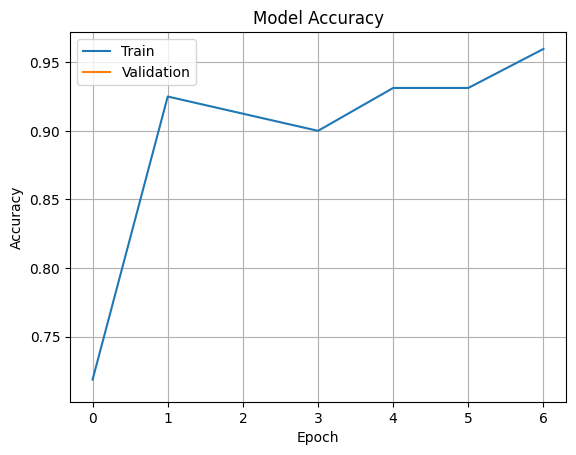

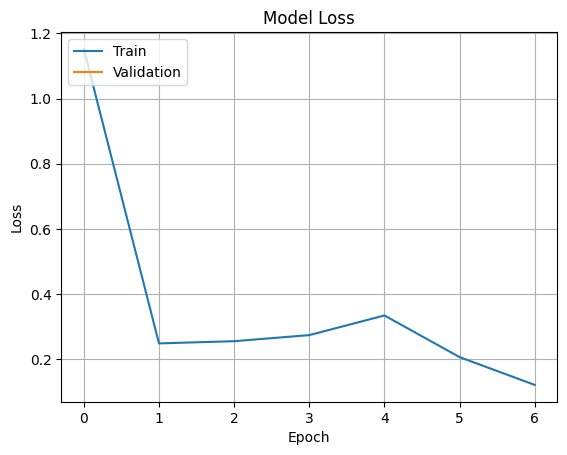

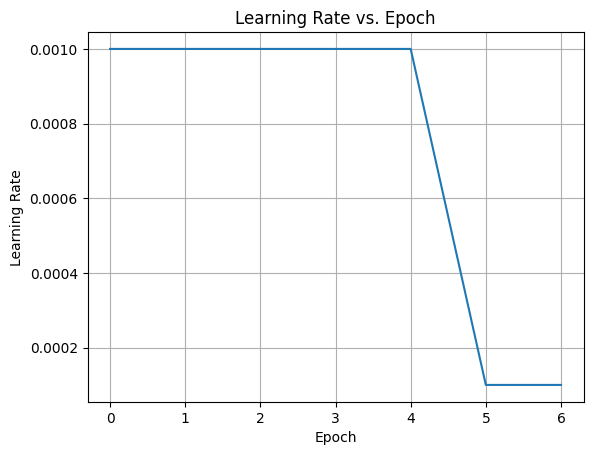

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
import matplotlib.pyplot as plt

# Define your learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch < 5:
        return 0.001  # Learning rate for the first 5 epochs
    elif epoch < 10:
        return 0.0001  # Learning rate for the next 5 epochs
    else:
        return 0.00001  # Learning rate for the remaining epochs

# Compile the model (assuming you have defined it and set the optimizer)
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Choose the desired learning rate schedule
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',    # Path to save the model
    monitor='val_accuracy',      # Metric to monitor
    save_best_only=True,         # Only save the model if the monitored metric improves
    mode='max',                  # Mode: 'max' for accuracy, 'min' for loss
    verbose=1                    # Verbosity mode, 0 or 1
)

# Add the learning rate scheduler and model checkpoint to the callbacks
callbacks = [learning_rate_scheduler, checkpoint_callback]

# Ensure train_data and val_data are properly defined
# Example of creating a tf.data.Dataset for training and validation data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/train',
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'  # Adjust based on your labels (e.g., 'categorical', 'binary', 'int')
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/validation',
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'  # Adjust based on your labels (e.g., 'categorical', 'binary', 'int')
)

# Train the model with the specified callbacks
history = model.fit(
    train_data,
    steps_per_epoch=5,
    epochs=50,
    verbose=1,
    validation_data=val_data,
    validation_steps=10,
    callbacks=callbacks
)

# Visualize training progress (accuracy, loss, and learning rate)

# Accuracy plot (if 'accuracy' and 'val_accuracy' are available)
if 'accuracy' in history.history.keys() and 'val_accuracy' in history.history.keys():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Learning rate plot
if 'lr' in history.history.keys():
    learning_rates = history.history['lr']
    epochs = range(len(learning_rates))
    plt.plot(epochs, learning_rates)
    plt.title('Learning Rate vs. Epoch')
    plt.ylabel('Learning Rate')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.show()


In [ ]:
model.save('my_model')

Found 4372 files belonging to 2 classes.
137/137 [==============================] - 4s 26ms/step - loss: 156.8168 - accuracy: 0.5771
Test accuracy: 0.5770814418792725
137/137 [==============================] - 3s 22ms/step


C:\ProgramData\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.44      1.00      0.61      1917
           1       0.00      0.00      0.00      2455

    accuracy                           0.44      4372
   macro avg       0.22      0.50      0.30      4372
weighted avg       0.19      0.44      0.27      4372

[[1917    0]
 [2455    0]]


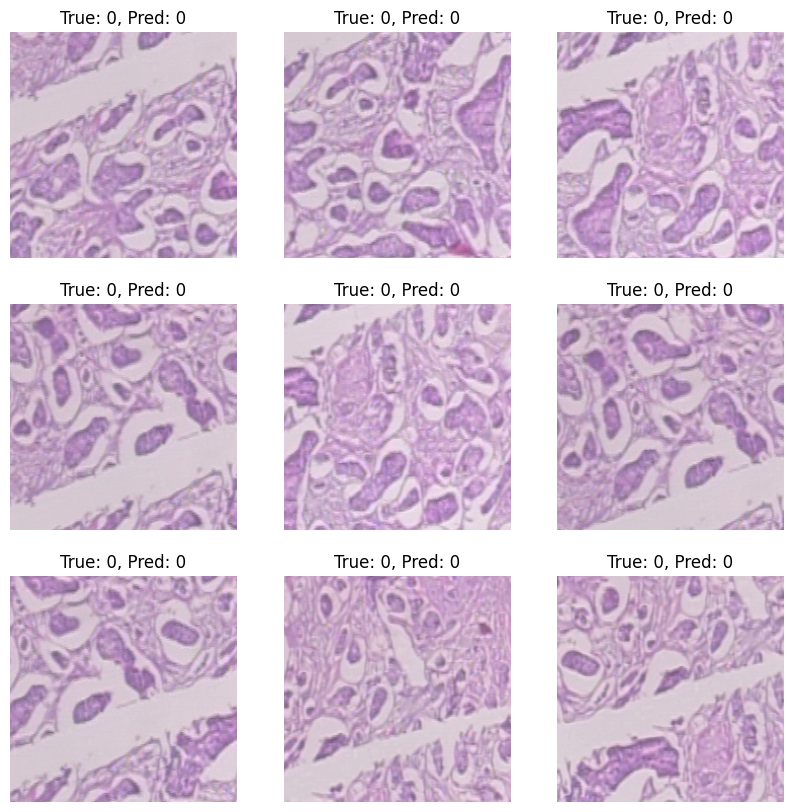

In [24]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    shuffle=False
)

# Load the best saved model
model = load_model('best_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(test_data)

# Get true labels and predictions
true_labels = np.concatenate([y for x, y in test_data], axis=0)
predicted_labels = np.argmax(predictions, axis=1)  # Assuming your model outputs probabilities

# Print classification report
print(classification_report(true_labels, predicted_labels))

# Print confusion matrix
print(confusion_matrix(true_labels, predicted_labels))

# Plot some test images with their predicted and true labels
plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
        plt.axis("off")
    plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_test_images(directory, image_size=(224, 224), batch_size=32):
    """Load test images from a directory."""
    return image_dataset_from_directory(
        directory,
        image_size=image_size,
        batch_size=batch_size,
        label_mode='int',  # Adjust this based on your needs (e.g., 'categorical', 'binary', None)
        shuffle=False  # Ensure the order of images is maintained for evaluation
    )

def preprocess_images(images):
    """Preprocess images using the same steps as the training data."""
    return images.map(lambda x, y: (preprocess_input(x), y))

def load_model(model_path):
    """Load the pre-trained model."""
    return load_model(model_path)

def check_test_images(test_images):
    """Check if test images are correctly formatted."""
    for images, labels in test_images.take(1):
        assert images.shape[1:] == (224, 224, 3), "Images are not in the expected shape."
        print("Test images are correctly formatted.")
        break

def predict(model, data):
    """Make predictions using the loaded model."""
    predictions = []
    for images, labels in data:
        preds = model.predict(images)
        predictions.extend(preds)
    return np.array(predictions)

def evaluate_predictions(predictions, true_labels):
    """Evaluate the predictions if true labels are provided."""
    from sklearn.metrics import accuracy_score

    # Assuming predictions are probabilities, convert to class labels
    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f'Accuracy: {accuracy}')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.models import load_model

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # or 'categorical' if more than two classes
)

val_data = val_datagen.flow_from_directory(
    '/content/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Compile the model with class weights
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Define class weights (example: class 0 has weight 1, class 1 has weight 2)
class_weights = {0: 1, 1: 2}

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Define the LearningRateScheduler callback
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with the specified callbacks and class weights
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=15,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size,
    callbacks=[learning_rate_scheduler, checkpoint_callback],
    class_weight=class_weights
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(test_data)

# Get true labels and predictions
true_labels = np.concatenate([y for x, y in test_data], axis=0)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(true_labels, predicted_labels))

# Print confusion matrix
print(confusion_matrix(true_labels, predicted_labels))


Found 1084 images belonging to 2 classes.
Found 235 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/15


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
33/33 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.8859

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 1: val_accuracy improved from -inf to 0.39286, saving model to best_model.h5
33/33 [==============================] - 46s 935ms/step - loss: 0.6861 - accuracy: 0.8859 - val_loss: 2.2745 - val_accuracy: 0.3929 - lr: 0.0010
Epoch 2/15
33/33 [==============================] - ETA: 0s - loss: 0.3893 - accuracy: 0.9030
Epoch 2: val_accuracy improved from 0.39286 to 0.40179, saving model to best_model.h5
33/33 [==============================] - 34s 1s/step - loss: 0.3893 - accuracy: 0.9030 - val_loss: 16.3985 - val_accuracy: 0.4018 - lr: 0.0010
Epoch 3/15
33/33 [==============================] - ETA: 0s - loss: 0.2886 - accuracy: 0.9135
Epoch 3: va

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - 3s 350ms/step


In [15]:
import tensorflow as tf

# Define a callback to save the best model
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode='max',  # Save the model when validation accuracy improves
    verbose=1  # Show progress messages
)

In [16]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11188\3762338528.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data, steps_per_epoch=5, epochs=50, verbose=1,


Epoch 1/50
5/5 [==============================] - 17s 2s/step - loss: 33.8972 - accuracy: 0.5700 - val_loss: 123.3920 - val_accuracy: 0.5974 - lr: 0.0100
Epoch 2/50
5/5 [==============================] - 4s 688ms/step - loss: 7.2433 - accuracy: 0.6950 - lr: 0.0056
Epoch 3/50
5/5 [==============================] - 4s 722ms/step - loss: 3.8021 - accuracy: 0.6750 - lr: 0.0038
Epoch 4/50
5/5 [==============================] - 3s 726ms/step - loss: 2.3818 - accuracy: 0.7195 - lr: 0.0029
Epoch 5/50
5/5 [==============================] - 4s 708ms/step - loss: 1.8184 - accuracy: 0.7550 - lr: 0.0024
Epoch 6/50
5/5 [==============================] - 3s 575ms/step - loss: 1.3878 - accuracy: 0.8049 - lr: 0.0020
Epoch 7/50
5/5 [==============================] - 4s 707ms/step - loss: 3.4032 - accuracy: 0.7100 - lr: 0.0017
Epoch 8/50
5/5 [==============================] - 4s 718ms/step - loss: 1.4015 - accuracy: 0.7100 - lr: 0.0015
Epoch 9/50
5/5 [==============================] - 3s 751ms/step - los

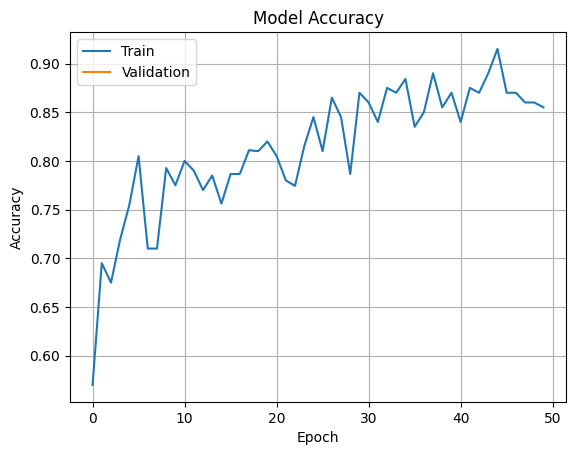

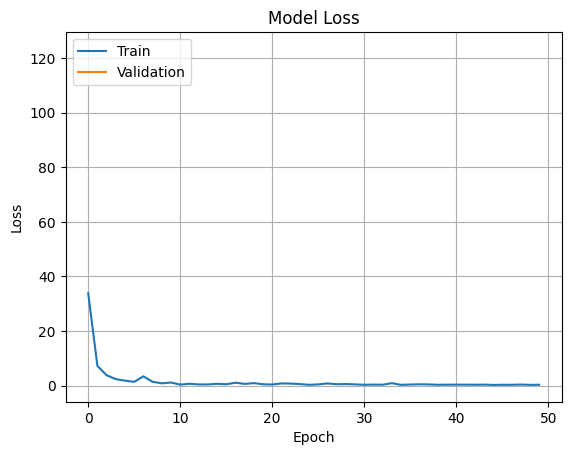

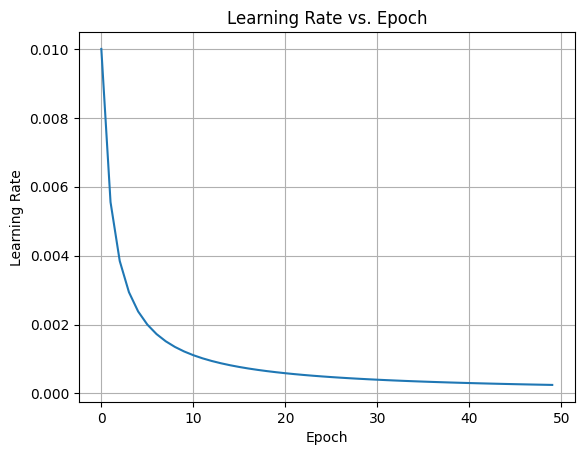

In [17]:
import matplotlib.pyplot as plt

# ... (rest of your code)

# Fit the model with learning rate scheduler
history = model.fit_generator(generator=train_data, steps_per_epoch=5, epochs=50, verbose=1,
                               validation_data=val_data, validation_steps=10,
                               callbacks=[learning_rate_scheduler])

# Visualize training progress (accuracy, loss, and learning rate)

# Accuracy plot (if 'accuracy' and 'val_accuracy' are available)
if 'accuracy' in history.history.keys() and 'val_accuracy' in history.history.keys():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Learning rate plot
learning_rates = history.history['lr']
epochs = range(len(learning_rates))
plt.plot(epochs, learning_rates)
plt.title('Learning Rate vs. Epoch')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()


In [ ]:
# Define the callback to save the best model
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',          # Save the model when validation loss is minimized
    verbose=1
)

# Train the model with the callback
history = model.fit_generator(
    train_data,
    steps_per_epoch=10,
    epochs=5,
    verbose=1,
    validation_data=val_data,
    validation_steps=16,
    callbacks=[model_checkpoint_callback]  # Pass the callback to the callbacks list
)

Epoch 1/5


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - ETA: 0s - loss: 1.3957 - accuracy: 0.7225

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert



Epoch 1: val_loss improved from inf to 7.97450, saving model to best_model.h5
10/10 [==============================] - 41s 2s/step - loss: 1.3957 - accuracy: 0.7225 - val_loss: 7.9745 - val_accuracy: 0.5974
Epoch 2/5
10/10 [==============================] - ETA: 0s - loss: 1.0284 - accuracy: 0.8375

10/10 [==============================] - 10s 1s/step - loss: 1.0284 - accuracy: 0.8375
Epoch 3/5
10/10 [==============================] - ETA: 0s - loss: 1.4430 - accuracy: 0.8297

10/10 [==============================] - 9s 845ms/step - loss: 1.4430 - accuracy: 0.8297
Epoch 4/5
10/10 [==============================] - ETA: 0s - loss: 2.2690 - accuracy: 0.8250

10/10 [==============================] - 12s 1s/step - loss: 2.2690 - accuracy: 0.8250
Epoch 5/5
10/10 [==============================] - ETA: 0s - loss: 1.3018 - accuracy: 0.8764

10/10 [==============================] - 10s 1s/step - loss: 1.3018 - accuracy: 0.8764


In [ ]:
!pip install scipy
import scipy
#history = model.fit( x=train_data,  steps_per_epoch=8, epochs=5,verbose=1,validation_data=val_data,   validation_steps=16, callbacks=cd)
# Print a success message
#print("Model training completed with early stopping and model checkpointing.")
#model.compile(loss=BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])
his = model.fit_generator(train_data,steps_per_epoch=10,epochs=5,verbose=1,validation_data=val_data,validation_steps=16,callbacks=cb)
#his = model.fit(x=train_data, steps_per_epoch=10, epochs=5, verbose=1, validation_data=val_data, validation_steps=16, callbacks=cd)

In [20]:
#model Accuracy
acc=model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100} %")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6412\1375694129.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(test_data)[1]


the accuracy of our model is 85.97895503044128 %


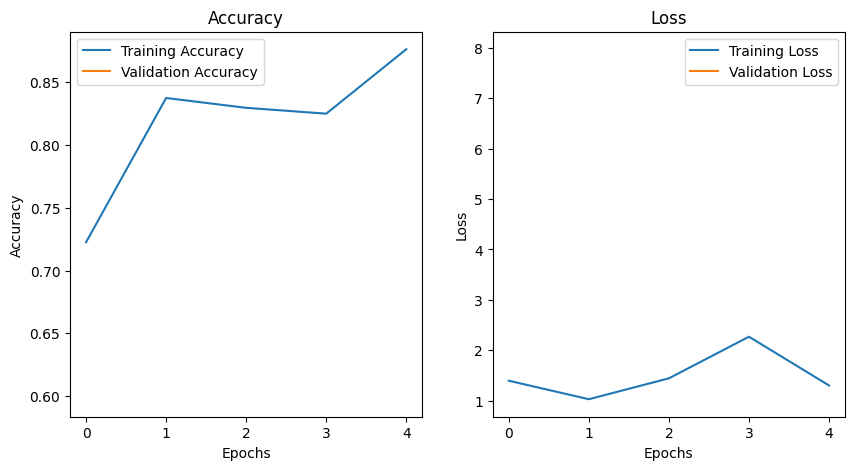

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

In [22]:
# Load the trained model
from tensorflow.keras.models import load_model

model = load_model('best_model.h5')  # Load the best model saved during training

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate_generator(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Alternatively, if you want accuracy only
print(f"The accuracy of our model on test data is: {test_accuracy * 100}%")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6412\3516129273.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_data)


Test Loss: 0.27710190415382385
Test Accuracy: 0.9048490524291992
The accuracy of our model on test data is: 90.48490524291992%


In [ ]:
import matplotlib.pyplot as plt

# Assuming h is a dictionary containing 'loss' and 'val_loss' lists
loss = h['loss']
val_loss = h['val_loss']

plt.plot(loss, label='Training Loss')  # Label for training loss
plt.plot(val_loss, label='Validation Loss', color='blue')  # Label and color for validation loss

# Customize label positioning and appearance (optional)
plt.legend(loc='upper left', title='Loss Curves')  # Position and title for legend
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer x-axis ticks

plt.title("Loss vs. Validation Loss")  # Corrected title with period
plt.xlabel("Epoch")  # Add x-axis label
plt.ylabel("Loss Value")  # Add y-axis label
plt.grid(True)  # Add grid lines for better readability

plt.show()

In [28]:
from tensorflow.keras.models import load_model

# Load the best model saved during training
model = load_model('best_model.h5')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your training and test directories (replace with your actual paths)
train_data_dir = 'test'
test_data_dir = 'train'

# Set image dimensions expected by your model (replace with your model's image dimensions)
img_width, img_height = 224, 224  # Example image dimensions

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale images to a range of [0, 1]

# Use the flow_from_directory method to generate a test data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,  # Adjust batch size based on your hardware and model complexity
    class_mode='binary'  # Assuming binary classification (benign/malignant)
)

# Replace 'test_data' in your previous code with 'test_generator'
test_data = test_generator



# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)  # This might require adjustments based on your data format

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test data
predictions = model.predict(test_data)
 # Assuming predictions are class probabilities for benign (0) and malignant (1)
print("Predicted labels (0: Benign, 1: Malignant):")
for pred in predictions:
  predicted_class = int(round(pred[0]))  # Assuming probability at index 0 represents benign
  class_label = "Benign" if predicted_class == 0 else "Malignant"
  print(class_label)
# Interpret the predictions based on your model's task
#  * Classification: Choose the class with the highest probability
#  * Regression: The predictions are the estimated values

#if isinstance(predictions[0], list):  # Assuming predictions are class probabilities
  #print("Predicted classes:")
  #for pred in predictions:
    #predicted_class = pred.argmax()  # Get the index of the highest probability
    #print(predicted_class)
#else:
  #print("Predicted continuous values:")
  #print(predictions)


Found 20405 images belonging to 2 classes.
638/638 [==============================] - 44s 69ms/step - loss: 0.2938 - accuracy: 0.9057
Test Loss: 0.2937666177749634
Test Accuracy: 0.9056603908538818
638/638 [==============================] - 44s 70ms/step
Predicted labels (0: Benign, 1: Malignant):
Benign
Benign
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Malignant
Benign
Malignant
Malignant
Benign
Malignant
Malignant
Malignant
Benign
Malignant
Malignant
Benign
Benign
Malignant
Benign
Benign
Malignant
Benign
Malignant
Malignant
Benign
Benign
Benign
Malignant
Benign
Benign
Benign
Benign
Malignant
Benign
Malignant
Malignant
Malignant
Benign
Malignant
Malignant
Malignant
Benign
Malignant
Benign
Malignant
Malignant
Malignant
Malignant
Malignant
Benign
Malignant
Malignant
Malignant
Benign
Benign
Malignant
Malignant
Benign
Benign
Malignant
Malignant
Malignant
Malignant
Benign
Malignant
Benign
Malignant
Malignant
Malignant
Malignant
Benign
Benign
Benign
Malignant
Mali

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Load the best model saved during training
model = load_model('best_model.h5')

# Define paths to your training and test directories (replace with your actual paths)
train_data_dir = 'train'
test_data_dir = 'test'

# Set image dimensions expected by your model (replace with your model's image dimensions)
img_width, img_height = 224, 224  # Example image dimensions

# Create an ImageDataGenerator for test data (rescale to [0, 1])
test_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to generate a test data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,  # Adjust batch size based on hardware and model complexity
    class_mode='binary'  # Assuming binary classification (benign/malignant)
)

# Evaluate the model on the test data (optional)
test_loss, test_accuracy = model.evaluate(test_generator)  # Adjusted for data generator
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test data
predictions = model.predict(test_generator)

# Assuming predictions are class probabilities for benign (0) and malignant (1)
predicted_classes = np.round(predictions[:, 0]).astype(int)  # Round probabilities and convert to class labels

# Get ground truth labels from test_generator (assuming it's labeled)
ground_truth = test_generator.classes

# Calculate confusion matrix and classification report
cm = confusion_matrix(ground_truth, predicted_classes)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(ground_truth, predicted_classes))

# Print predicted labels for optional verification (if desired)
print("\nPredicted labels (0: Benign, 1: Malignant):")
for i, pred in enumerate(predicted_classes):
    class_label = "Benign" if pred == 0 else "Malignant"
    print(f"Image {i+1}: {class_label}")


Found 4373 images belonging to 2 classes.
137/137 [==============================] - 10s 68ms/step - loss: 0.2793 - accuracy: 0.9072
Test Loss: 0.27934905886650085
Test Accuracy: 0.9071575403213501
137/137 [==============================] - 10s 70ms/step
Confusion Matrix:
 [[ 778 1140]
 [ 964 1491]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.41      0.43      1918
           1       0.57      0.61      0.59      2455

    accuracy                           0.52      4373
   macro avg       0.51      0.51      0.51      4373
weighted avg       0.51      0.52      0.52      4373


Predicted labels (0: Benign, 1: Malignant):
Image 1: Malignant
Image 2: Benign
Image 3: Benign
Image 4: Malignant
Image 5: Malignant
Image 6: Malignant
Image 7: Benign
Image 8: Malignant
Image 9: Malignant
Image 10: Malignant
Image 11: Malignant
Image 12: Malignant
Image 13: Malignant
Image 14: Malignant
Image 15: Malignant
Image 16: Malignant


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16  # Example pre-trained model
from kerastuner import RandomSearch

# Define paths to your training and test directories (replace with your actual paths)
train_data_dir = 'path/to/training/images'
test_data_dir = 'path/to/test/images'

# Set image dimensions expected by your model
img_width, img_height = 224, 224  # Assuming VGG16 input size

# Create training and validation data generators (adjust batch size)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'  # Assuming binary classification
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    train_data_dir,  # Use a subset of training data for validation (adjust path if needed)
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Define the model to be tuned (replace with your model if not using VGG16)
def build_model(hp):
  # Load pre-trained model (freeze base layers)
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
  for layer in base_model.layers:
    layer.trainable = False

  # Add custom layers for classification
  x = base_model.output
  x = hp.HyperParameter.Int('units', min_value=32, max_value=128, step=32)  # Tune number of units in dense layer
  x = layers.Dense(x, activation='relu')(x)
  x = layers.Dropout(hp.HyperParameter.Float('dropout', min_value=0.2, max_value=0.5))  # Tune dropout rate
  predictions = layers.Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp.HyperParameter.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')), metrics=['accuracy'])
  return model

# Define the tuner (RandomSearch in this case)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of random searches
    executions_per_trial=1,  # Train each model configuration once
    directory='my_tuner_results'  # Optional directory to save results
)

# Start hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)  # Adjust epochs for tuning

# Get the best model
best_model = tuner.get_best_models()[0]

# Evaluate the best model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Use the best_model for predictions on new data


In [32]:
#hyper parameter tunning


!pip install keras-tuner
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from kerastuner import RandomSearch

# Define paths to your training and test directories (replace with your actual paths)
train_data_dir = 'train'
test_data_dir = 'test'

# Set image dimensions expected by your model
img_width, img_height = 224, 224  # Assuming VGG16 input size

# Create training and validation data generators (adjust batch size)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'  # Assuming binary classification
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_data_dir,  # Use a subset of training data for validation (adjust path if needed)
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Define the model to be tuned (replace with your model if not using VGG16)
def build_model(hp):
    # Load pre-trained model (freeze base layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for classification
    x = base_model.output
    x=layers.Flatten()(x)
    x = layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32))(x)  # Tune number of units in dense layer
    x = layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5))(x)  # Tune dropout rate
    predictions = layers.Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')), metrics=['accuracy'])
    return model


# Define the tuner (RandomSearch in this case)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # Adjust the number of random searches
    executions_per_trial=1,  # Train each model configuration once
    directory='my_tuner_results'  # Optional directory to save results
)

# Start hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)  # Adjust epochs for tuning

# Get the best model
best_model = tuner.get_best_models()[0]

# Evaluate the best model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Use the best_model for predictions on new data



Trial 3 Complete [00h 01m 36s]
val_accuracy: 0.7991452813148499

Best val_accuracy So Far: 0.9059829115867615
Total elapsed time: 00h 11m 30s
Found 234 images belonging to 2 classes.
8/8 [==============================] - 2s 205ms/step - loss: 0.2723 - accuracy: 0.9060
Test Loss: 0.27231499552726746
Test Accuracy: 0.9059829115867615


In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Use the best_model for predictions on the test data
predictions = best_model.predict(test_generator)
y_pred = np.round(predictions).reshape(-1)
y_true = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

8/8 [==============================] - 2s 235ms/step
Confusion Matrix:
[[36 60]
 [60 78]]


Trial 1 Complete [00h 02m 07s]
val_accuracy: 0.8333333134651184

Best val_accuracy So Far: 0.8333333134651184
Total elapsed time: 00h 02m 07s
Found 234 images belonging to 2 classes.
8/8 [==============================] - 2s 203ms/step


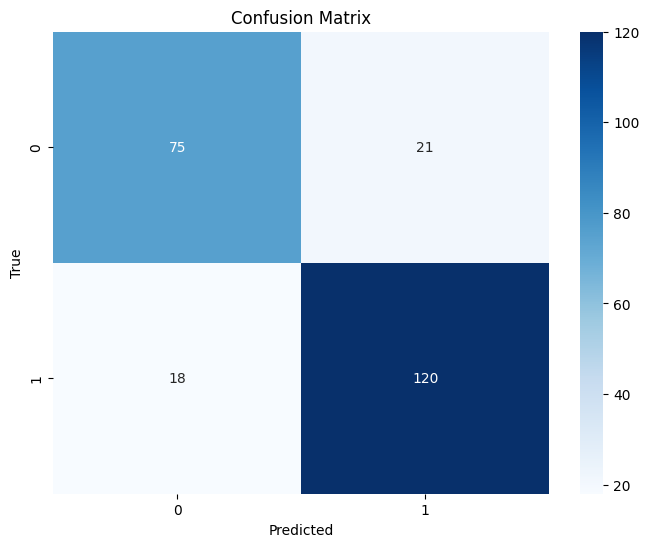

              precision    recall  f1-score   support

  benign 40X       0.81      0.78      0.79        96
maligant 40X       0.85      0.87      0.86       138

    accuracy                           0.83       234
   macro avg       0.83      0.83      0.83       234
weighted avg       0.83      0.83      0.83       234

ROC AUC: 0.9221


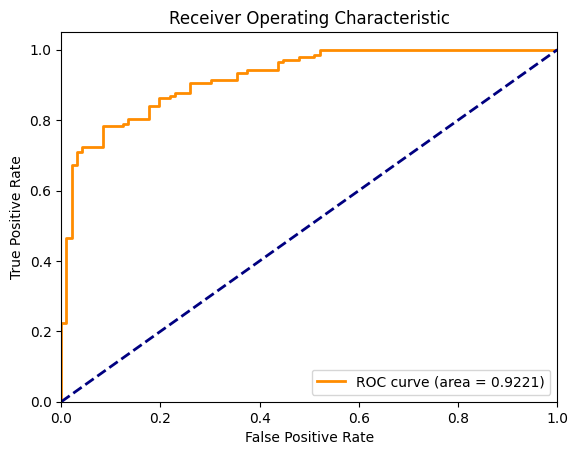

In [35]:
# Install necessary packages
!pip install keras-tuner

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to your training and test directories (replace with your actual paths)
train_data_dir = 'train'
test_data_dir = 'test'

# Set image dimensions expected by your model
img_width, img_height = 224, 224  # Assuming VGG16 input size

# Create training and validation data generators (adjust batch size)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'  # Assuming binary classification
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_data_dir,  # Use a subset of training data for validation (adjust path if needed)
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Define the model to be tuned (replace with your model if not using VGG16)
def build_model(hp):
    # Load pre-trained model (freeze base layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for classification
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32))(x)  # Tune number of units in dense layer
    x = layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5))(x)  # Tune dropout rate
    predictions = layers.Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')), metrics=['accuracy'])
    return model

# Define the tuner (RandomSearch in this case)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # Adjust the number of random searches
    executions_per_trial=1,  # Train each model configuration once
    directory='my_tuner_results1'  # Optional directory to save results
)

# Start hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)  # Adjust epochs for tuning

# Get the best model
best_model = tuner.get_best_models()[0]

# Evaluate the best model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Generate predictions
y_pred_prob = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and other metrics
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Calculate ROC AUC
auc = roc_auc_score(y_true, y_pred_prob)
print(f'ROC AUC: {auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Trial 10 Complete [00h 01m 34s]
val_accuracy: 0.8846153616905212

Best val_accuracy So Far: 0.9059829115867615
Total elapsed time: 00h 19m 59s
Found 234 images belonging to 2 classes.
8/8 [==============================] - 2s 204ms/step


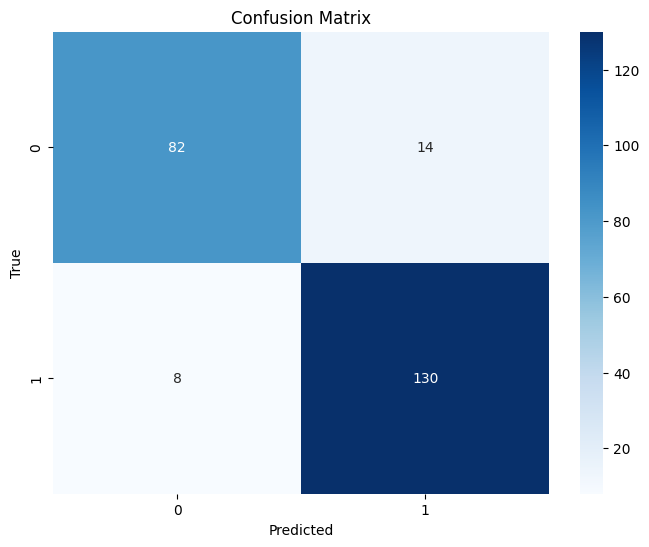

              precision    recall  f1-score   support

  benign 40X       0.91      0.85      0.88        96
maligant 40X       0.90      0.94      0.92       138

    accuracy                           0.91       234
   macro avg       0.91      0.90      0.90       234
weighted avg       0.91      0.91      0.91       234

ROC AUC: 0.9558


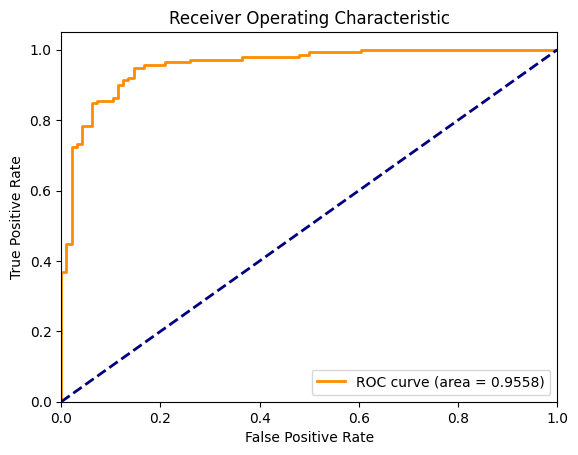

In [36]:
# Install necessary packages
!pip install keras-tuner

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to your training and test directories (replace with your actual paths)
train_data_dir = 'train'
test_data_dir = 'test'

# Set image dimensions expected by your model
img_width, img_height = 224, 224  # Assuming VGG16 input size

# Create training and validation data generators (adjust batch size)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'  # Assuming binary classification
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_data_dir,  # Use a subset of training data for validation (adjust path if needed)
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Define the model to be tuned (replace with your model if not using VGG16)
def build_model(hp):
    # Load pre-trained model (freeze base layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for classification
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32))(x)  # Tune number of units in dense layer
    x = layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5))(x)  # Tune dropout rate
    predictions = layers.Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')), metrics=['accuracy'])
    return model

# Define the tuner (RandomSearch in this case)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of random searches
    executions_per_trial=1,  # Train each model configuration once
    directory='my_tuner_results1'  # Optional directory to save results
)

# Start hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)  # Adjust epochs for tuning

# Get the best model
best_model = tuner.get_best_models()[0]

# Evaluate the best model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Generate predictions
y_pred_prob = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and other metrics
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Calculate ROC AUC
auc = roc_auc_score(y_true, y_pred_prob)
print(f'ROC AUC: {auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Trial 1 Complete [00h 01m 34s]
val_accuracy: 0.8846153616905212

Best val_accuracy So Far: 0.8846153616905212
Total elapsed time: 00h 01m 34s
Epoch 1/40
34/34 [==============================] - 10s 281ms/step - loss: 0.0635 - accuracy: 0.9843 - val_loss: 0.2786 - val_accuracy: 0.8803 - lr: 3.2916e-04
Epoch 2/40
34/34 [==============================] - 9s 269ms/step - loss: 0.0540 - accuracy: 0.9889 - val_loss: 0.2603 - val_accuracy: 0.8889 - lr: 2.9784e-04
Epoch 3/40
34/34 [==============================] - 9s 271ms/step - loss: 0.0380 - accuracy: 0.9945 - val_loss: 0.2487 - val_accuracy: 0.8932 - lr: 2.6949e-04
Epoch 4/40
34/34 [==============================] - 9s 268ms/step - loss: 0.0351 - accuracy: 0.9954 - val_loss: 0.2660 - val_accuracy: 0.8846 - lr: 2.4385e-04
Epoch 5/40
34/34 [==============================] - 9s 273ms/step - loss: 0.0306 - accuracy: 0.9982 - val_loss: 0.2475 - val_accuracy: 0.8889 - lr: 2.2064e-04
Epoch 6/40
34/34 [==============================] - 9s 273ms/s

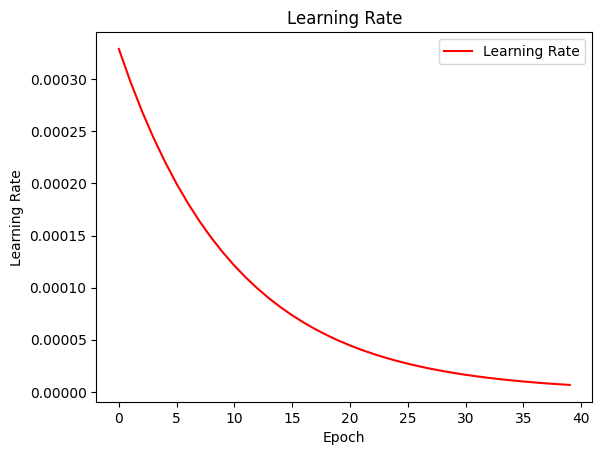

Found 234 images belonging to 2 classes.
8/8 [==============================] - 2s 204ms/step


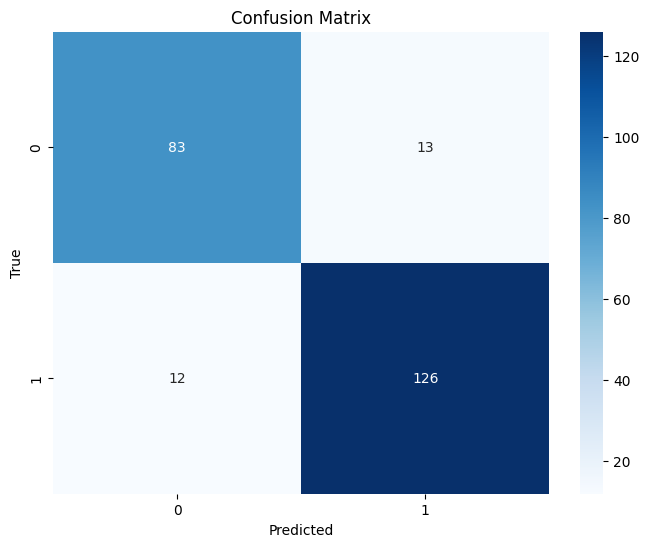

              precision    recall  f1-score   support

  benign 40X       0.87      0.86      0.87        96
maligant 40X       0.91      0.91      0.91       138

    accuracy                           0.89       234
   macro avg       0.89      0.89      0.89       234
weighted avg       0.89      0.89      0.89       234

ROC AUC: 0.9620


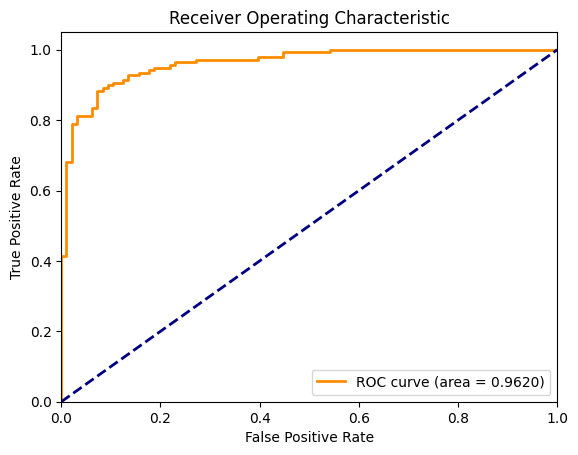

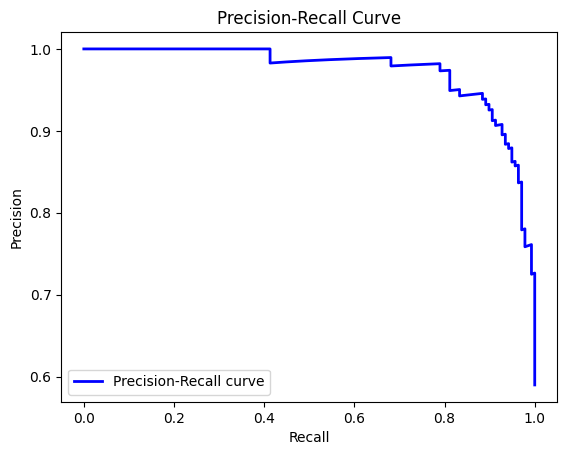

In [37]:
#learning rate graph

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to your training and test directories (replace with your actual paths)
train_data_dir = 'train'
test_data_dir = 'test'

# Set image dimensions expected by your model
img_width, img_height = 224, 224  # Assuming VGG16 input size

# Create training and validation data generators (adjust batch size)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'  # Assuming binary classification
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_data_dir,  # Use a subset of training data for validation (adjust path if needed)
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Define the model to be tuned (replace with your model if not using VGG16)
def build_model(hp):
    # Load pre-trained model (freeze base layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for classification
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32))(x)  # Tune number of units in dense layer
    x = layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5))(x)  # Tune dropout rate
    predictions = layers.Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')), metrics=['accuracy'])
    return model

# Define the tuner (RandomSearch in this case)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # Adjust the number of random searches
    executions_per_trial=1,  # Train each model configuration once
    directory='my_tuner_results2'  # Optional directory to save results
)

# Start hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)  # Adjust epochs for tuning

# Get the best model
best_model = tuner.get_best_models()[0]

# Define a function to schedule the learning rate
def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)  # Exponential decay schedule

# Create a callback for the learning rate scheduler
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Train the best model again with the learning rate scheduler callback
history = best_model.fit(
    train_generator,
    epochs=40,  # Adjust epochs as needed
    validation_data=validation_generator,
    callbacks=[lr_callback]
)

# Plot learning rate across epochs
plt.plot(history.history['lr'], label='Learning Rate', color='red')
plt.title('Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

# Evaluate the best model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Generate predictions
y_pred_prob = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and other metrics
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Calculate ROC AUC
auc = roc_auc_score(y_true, y_pred_prob)
print(f'ROC AUC: {auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Trial 1 Complete [00h 01m 39s]
val_accuracy: 0.6666666865348816

Best val_accuracy So Far: 0.6666666865348816
Total elapsed time: 00h 01m 39s
Epoch 1/10
34/34 [==============================] - 11s 289ms/step - loss: 0.7471 - accuracy: 0.6061 - val_loss: 0.8822 - val_accuracy: 0.6239 - lr: 3.2107e-05
Epoch 2/10
34/34 [==============================] - 9s 274ms/step - loss: 0.7209 - accuracy: 0.5959 - val_loss: 0.6397 - val_accuracy: 0.5299 - lr: 2.9052e-05
Epoch 3/10
34/34 [==============================] - 9s 273ms/step - loss: 0.6495 - accuracy: 0.6375 - val_loss: 0.6099 - val_accuracy: 0.6581 - lr: 2.6287e-05
Epoch 4/10
34/34 [==============================] - 9s 273ms/step - loss: 0.6123 - accuracy: 0.6411 - val_loss: 0.6042 - val_accuracy: 0.6752 - lr: 2.3786e-05
Epoch 5/10
34/34 [==============================] - 9s 271ms/step - loss: 0.6119 - accuracy: 0.6411 - val_loss: 0.6642 - val_accuracy: 0.6496 - lr: 2.1522e-05
Epoch 6/10
34/34 [==============================] - 9s 268ms/s

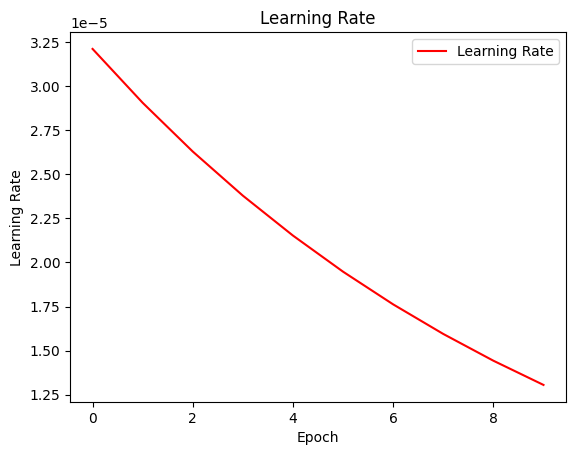

Found 234 images belonging to 2 classes.
8/8 [==============================] - 2s 201ms/step


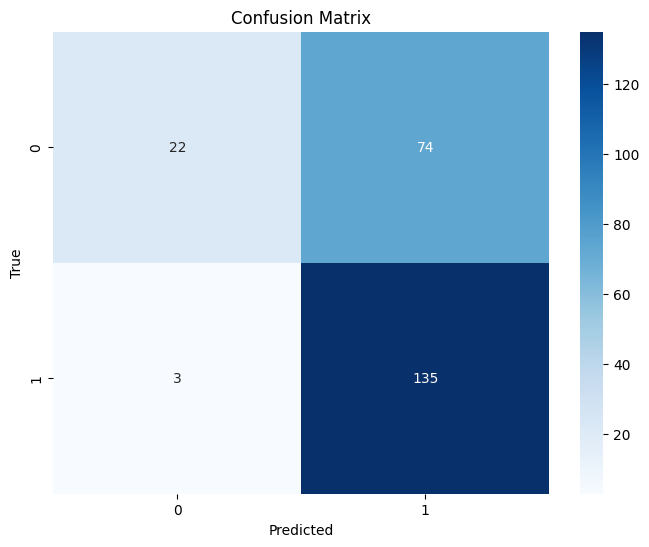

              precision    recall  f1-score   support

  benign 40X       0.88      0.23      0.36        96
maligant 40X       0.65      0.98      0.78       138

    accuracy                           0.67       234
   macro avg       0.76      0.60      0.57       234
weighted avg       0.74      0.67      0.61       234

ROC AUC: 0.7394


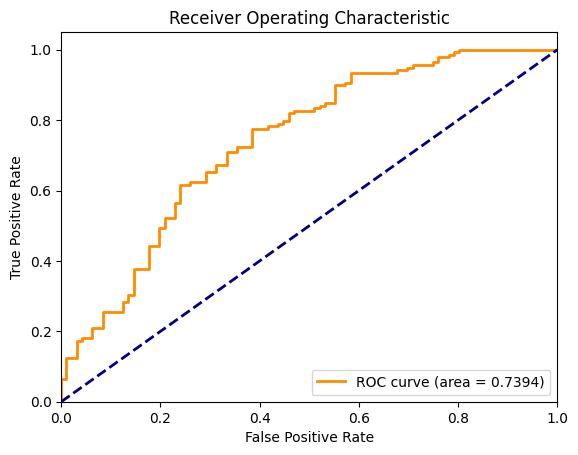

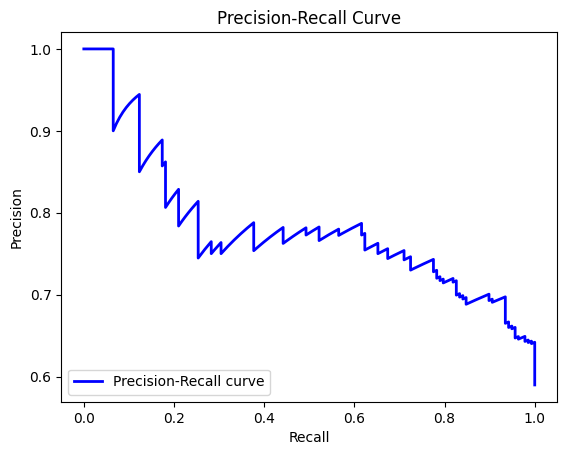

In [38]:
# prediction on Resnet50
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50  # Change import
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to your training and test directories (replace with your actual paths)
train_data_dir = 'train'
test_data_dir = 'test'

# Set image dimensions expected by your model
img_width, img_height = 224, 224  # Assuming ResNet50 input size

# Create training and validation data generators (adjust batch size)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'  # Assuming binary classification
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_data_dir,  # Use a subset of training data for validation (adjust path if needed)
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Define the model to be tuned (replace with your model if not using ResNet50)
def build_model(hp):
    # Load pre-trained model (freeze base layers)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))  # Change model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for classification
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32))(x)  # Tune number of units in dense layer
    x = layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5))(x)  # Tune dropout rate
    predictions = layers.Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')), metrics=['accuracy'])
    return model

# Define the tuner (RandomSearch in this case)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # Adjust the number of random searches
    executions_per_trial=1,  # Train each model configuration once
    directory='my_tuner_results3'  # Optional directory to save results
)

# Start hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)  # Adjust epochs for tuning

# Get the best model
best_model = tuner.get_best_models()[0]

# Define a function to schedule the learning rate
def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)  # Exponential decay schedule

# Create a callback for the learning rate scheduler
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Train the best model again with the learning rate scheduler callback
history = best_model.fit(
    train_generator,
    epochs=10,  # Adjust epochs as needed
    validation_data=validation_generator,
    callbacks=[lr_callback]
)

# Plot learning rate across epochs
plt.plot(history.history['lr'], label='Learning Rate', color='red')
plt.title('Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

# Evaluate the best model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Generate predictions
y_pred_prob = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and other metrics
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Calculate ROC AUC
auc = roc_auc_score(y_true, y_pred_prob)
print(f'ROC AUC: {auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

 

Trial 10 Complete [00h 01m 37s]
val_accuracy: 0.8547008633613586

Best val_accuracy So Far: 0.8632478713989258
Total elapsed time: 00h 22m 00s
Epoch 1/10
34/34 [==============================] - 10s 280ms/step - loss: 0.5105 - accuracy: 0.7675 - val_loss: 0.5076 - val_accuracy: 0.8333 - lr: 4.2419e-04
Epoch 2/10
34/34 [==============================] - 9s 268ms/step - loss: 0.5006 - accuracy: 0.7685 - val_loss: 0.5086 - val_accuracy: 0.8590 - lr: 3.8382e-04
Epoch 3/10
34/34 [==============================] - 9s 270ms/step - loss: 0.4950 - accuracy: 0.7611 - val_loss: 0.5085 - val_accuracy: 0.8162 - lr: 3.4729e-04
Epoch 4/10
34/34 [==============================] - 9s 268ms/step - loss: 0.4868 - accuracy: 0.7666 - val_loss: 0.4997 - val_accuracy: 0.8333 - lr: 3.1424e-04
Epoch 5/10
34/34 [==============================] - 9s 268ms/step - loss: 0.4570 - accuracy: 0.7814 - val_loss: 0.5028 - val_accuracy: 0.8376 - lr: 2.8434e-04
Epoch 6/10
34/34 [==============================] - 9s 269ms/

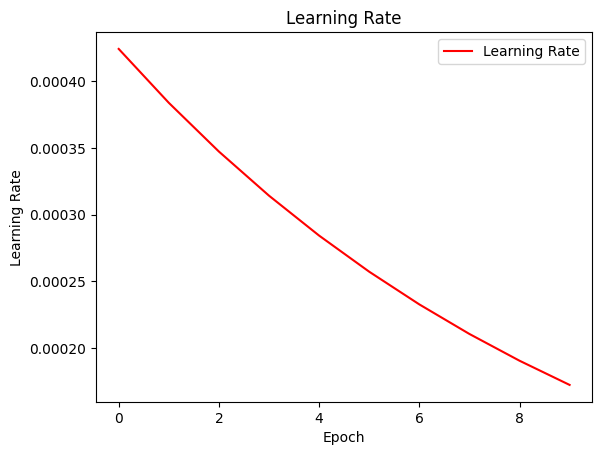

Found 234 images belonging to 2 classes.
8/8 [==============================] - 2s 194ms/step


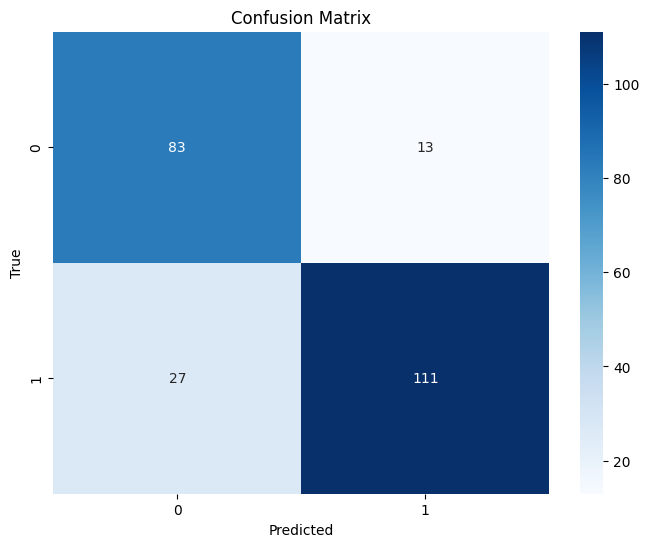

              precision    recall  f1-score   support

  benign 40X       0.75      0.86      0.81        96
maligant 40X       0.90      0.80      0.85       138

    accuracy                           0.83       234
   macro avg       0.82      0.83      0.83       234
weighted avg       0.84      0.83      0.83       234

ROC AUC: 0.9001


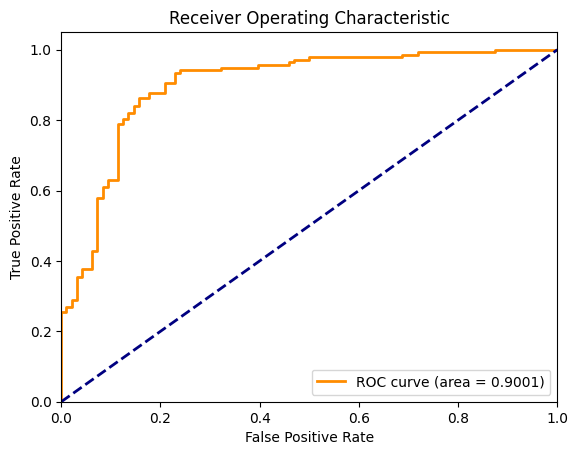

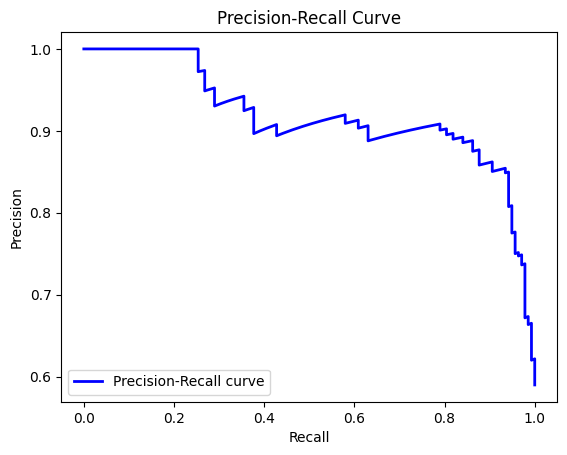

In [41]:

#prediction on cnn

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, Sequential
from kerastuner.tuners import RandomSearch
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to your training and test directories (replace with your actual paths)
train_data_dir = 'train'
test_data_dir = 'test'

# Set image dimensions expected by your model
img_width, img_height = 224, 224

# Create training and validation data generators (adjust batch size)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Define the model to be tuned (replace with your custom CNN model)
def build_model(hp):
    model = Sequential()
    model.add(layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32), 
                            kernel_size=hp.Choice('conv_1_kernel', values=[3,5]), 
                            activation='relu', 
                            input_shape=(img_width, img_height, 3)))
    model.add(layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16), 
                            kernel_size=hp.Choice('conv_2_kernel', values=[3,5]), 
                            activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(layers.Conv2D(filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16), 
                            kernel_size=hp.Choice('conv_3_kernel', values=[3,5]), 
                            activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Define the tuner (RandomSearch in this case)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of random searches
    executions_per_trial=1,  # Train each model configuration once
    directory='my_tuner_results4'  # Optional directory to save results
)

# Start hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)  # Adjust epochs for tuning

# Get the best model
best_model = tuner.get_best_models()[0]

# Define a function to schedule the learning rate
def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)  # Exponential decay schedule

# Create a callback for the learning rate scheduler
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Train the best model again with the learning rate scheduler callback
history = best_model.fit(
    train_generator,
    epochs=10,  # Adjust epochs as needed
    validation_data=validation_generator,
    callbacks=[lr_callback]
)

# Plot learning rate across epochs
plt.plot(history.history['lr'], label='Learning Rate', color='red')
plt.title('Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

# Evaluate the best model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Generate predictions
y_pred_prob = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and other metrics
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Calculate ROC AUC
auc = roc_auc_score(y_true, y_pred_prob)
print(f'ROC AUC: {auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

